In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import eli5

In [2]:
pos_data = []
neg_data = []
pos_data_labels = []
neg_data_labels = []
with open("./../train_pos.txt") as f:
    for i in f: 
        t = i.replace('<user>', '')
        t1 = t.replace('<url>', '')
        pos_data.append(t1)
        pos_data_labels.append('pos')

with open("./../train_neg.txt") as f:
    for i in f:
        t = i.replace('<user>', '')
        t1 = t.replace('<url>', '')
        neg_data.append(t1)
        neg_data_labels.append('neg')

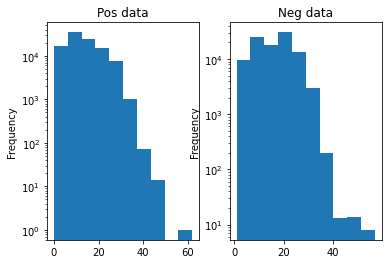

In [5]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
pd.Series(pos_data).apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Pos data');
plt.subplot(1, 2, 2)
pd.Series(neg_data).apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Neg data');


In [7]:
data = pos_data + neg_data
data_labels = pos_data_labels + neg_data_labels

In [27]:
N = len(data)
np_data = np.array(data)
print(np_data.shape)
np_data_labels = np.array(data_labels)
np.random.seed(20)
shuffler = np.random.permutation(N)
Ntrain = 150000


(200000,)


In [28]:
X_train = np_data[shuffler[:Ntrain]]
y_train = np_data_labels[shuffler[:Ntrain]]
X_test = np_data[shuffler[Ntrain:]]
y_test = np_data_labels[shuffler[Ntrain:]]

In [41]:
print(X_train[:10])

['binary file raw / twitter.2012-04-23-20.lzo.cleaned matches\n'
 'he is my favorite  \n'
 '  any tips for studying ? mugging for two tests tomorrow right now #askretwittings destroy the internet .\n'
 'back in the day ! * sigh * so thin lol \n'
 ' lol " i hope you get meth teeth . " still laughing about that one .\n'
 " be ready when i get off work haha we're gettin you a job\n"
 "chinchilla's are so ugly . lool ~ jk love you kat\n"
 'note to self ... alcohol and sushi do not mix . currently feeling like shit , got a 4 hour lab to go to and am really tired ! .\n'
 ' yeah , beds can cost a bit but so worth it . i shop at petsmart and online . not petco - they sell rodents as snake food\n'
 "dear unfollowers , i get it . you obviously can't handle seeing my amazing-ness all over your timeline .\n"]


In [30]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000) # try nltk stop words

In [31]:
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [32]:
logit = LogisticRegression(solver='lbfgs', random_state=17, n_jobs=4)

In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [34]:
cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

/Users/abhinavkumar/prj/ml/.ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhinavkumar/prj/ml/.ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [35]:
cv_results, cv_results.mean()

(array([0.79476667, 0.80063333, 0.79543333, 0.79626667, 0.7991    ]),
 0.7972400000000001)

In [36]:
logit.fit(X_train_text, y_train)

/Users/abhinavkumar/prj/ml/.ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=4, random_state=17)

In [37]:
eli5.show_weights(estimator=logit, 
                  feature_names= list(text_transformer.get_feature_names()),
                 top=(50, 5))

/Users/abhinavkumar/prj/ml/.ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+6.680,thank
+5.671,thanks
+5.378,glad
+5.304,yougetmajorpointsif
+4.544,welcome
+4.507,excited
+4.396,smile
+4.388,haha
+4.232,finally
+4.218,proud


In [38]:
test_preds = logit.predict(X_test_text)

In [39]:
print(test_preds[:10])

['neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg']


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_preds))

0.79876
